In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [3]:
df=pd.read_csv("/content/IBNSINA.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*  ...    YCP   TRADE  VALUE (mn)    VOLUME
0  439 2018-05-08      IBNSINA  306.0  ...  306.3  1217.0      64.278  206556.0
1  438 2018-06-08      IBNSINA  301.8  ...  306.1   744.0      32.516  107437.0
2  437 2018-07-08      IBNSINA  296.6  ...  300.3   817.0      37.425  125501.0
3  436 2018-08-08      IBNSINA  298.8  ...  295.1   708.0      39.266  131382.0
4  435 2018-09-08      IBNSINA  300.0  ...  296.3   628.0      24.447   82592.0

[5 rows x 12 columns]

In [4]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE   LTP*  ...    YCP  TRADE  VALUE (mn)    VOLUME
36  403 2018-01-10      IBNSINA  280.1  ...  279.7  698.0      31.318  110873.0
59  380 2018-01-11      IBNSINA  238.3  ...  240.4  296.0       6.548   27435.0
37  402 2018-02-10      IBNSINA  277.5  ...  280.3  827.0      33.399  120034.0
79  360 2018-02-12      IBNSINA  240.0  ...  242.0  477.0      10.392   43333.0
16  423 2018-03-09      IBNSINA  290.2  ...  292.6  391.0      20.225   69398.0

[5 rows x 12 columns]

In [5]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [6]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [7]:
df['volatility'] = df['volatility']*100

In [8]:
import matplotlib.pyplot as plt 

In [9]:
df=df.reset_index()['volatility']

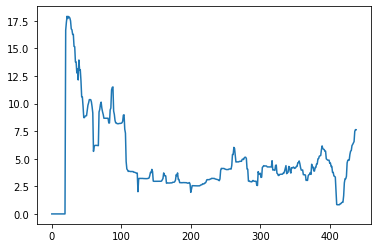

In [10]:
plt.plot(df)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_test.shape

(31, 100, 1)

In [18]:

filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIbnsina/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIbnsina/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsIbnsina/model3.h5"

In [19]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 63ms/step - loss: 0.0255 - val_loss: 0.0275
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0083 - val_loss: 0.0185
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0047 - val_loss: 0.0199
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0196
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0193
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0182
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0175
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 9.6532e-04 - val_loss: 0.0170
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 9.3119e-04 - val_loss: 0.0166
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 8.4386e-04 - val_loss: 0.0164
Epoch 11/1

In [20]:
model1.save(filepath1)

In [21]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 271ms/step - loss: 0.0278 - val_loss: 0.0232
Epoch 2/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0035 - val_loss: 0.0202
Epoch 3/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0035 - val_loss: 0.0182
Epoch 4/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0024 - val_loss: 0.0177
Epoch 5/100
7/7 [==============================] - 1s 133ms/step - loss: 0.0023 - val_loss: 0.0175
Epoch 6/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0020 - val_loss: 0.0173
Epoch 7/100
7/7 [==============================] - 1s 134ms/step - loss: 0.0021 - val_loss: 0.0174
Epoch 8/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0019 - val_loss: 0.0173
Epoch 9/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0020 - val_loss: 0.0172
Epoch 10/100
7/7 [==============================] - 1s 132ms/step - loss: 0.0019 - val_loss: 0.0172
Epoch 11/

In [22]:
model2.save(filepath2)

In [23]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 12s 490ms/step - loss: 0.0184 - val_loss: 0.0154
Epoch 2/100
7/7 [==============================] - 2s 222ms/step - loss: 0.0040 - val_loss: 0.0145
Epoch 3/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0018 - val_loss: 0.0141
Epoch 4/100
7/7 [==============================] - 2s 219ms/step - loss: 0.0016 - val_loss: 0.0135
Epoch 5/100
7/7 [==============================] - 2s 220ms/step - loss: 0.0013 - val_loss: 0.0129
Epoch 6/100
7/7 [==============================] - 2s 221ms/step - loss: 0.0014 - val_loss: 0.0130
Epoch 7/100
7/7 [==============================] - 2s 221ms/step - loss: 0.0016 - val_loss: 0.0123
Epoch 8/100
7/7 [==============================] - 2s 215ms/step - loss: 0.0017 - val_loss: 0.0119
Epoch 9/100
7/7 [==============================] - 1s 214ms/step - loss: 0.0018 - val_loss: 0.0122
Epoch 10/100
7/7 [==============================] - 2s 218ms/step - loss: 0.0015 - val_loss: 0.0114
Epoch 11

In [24]:
model3.save(filepath3)

In [25]:
from keras.models import load_model

In [26]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsIbnsina/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [27]:
print(len(all_models))

3


In [28]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsIbnsina/model1.h5'
model = load_model(f1)


In [29]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [30]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [31]:

#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

4.008910154588288

In [32]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [33]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [34]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [35]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [36]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [37]:

#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name


In [38]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [39]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [40]:
stacked_model = define_stacked_model(all_models)

In [41]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [42]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [43]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.21985981, 0.2153065 , 0.21698923],
       [0.21643013, 0.20791216, 0.21036465],
       [0.21097174, 0.19875322, 0.20503768],
       [0.19929677, 0.16893242, 0.18785132],
       [0.18123212, 0.11945371, 0.15921032],
       [0.1701551 , 0.08719122, 0.13701992],
       [0.15765704, 0.06558412, 0.12508483],
       [0.14860126, 0.05191653, 0.11731794],
       [0.14232893, 0.04262596, 0.11179675],
       [0.13869902, 0.03746244, 0.10853003],
       [0.13683179, 0.03495972, 0.10666936],
       [0.13784008, 0.03704179, 0.10652123],
       [0.13900411, 0.03917217, 0.10694876],
       [0.1413267 , 0.04309221, 0.10792594],
       [0.14854531, 0.05512376, 0.11231311],
       [0.1611416 , 0.08694772, 0.12947497],
       [0.1704561 , 0.12029985, 0.15181501],
       [0.18124768, 0.15034753, 0.1698082 ],
       [0.19393331, 0.18085782, 0.1860574 ],
       [0.20796211, 0.22642107, 0.21225226],
       [0.21822897, 0.2564894 , 0.23621032],
       [0.2282762 , 0.28232962, 0.25344044],
       [0.

In [44]:
yhat=scaler.inverse_transform(yhat)

In [45]:
x, y, z = yhat.T

In [46]:
avg = (x+y+z)/3

In [47]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [48]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

1.0151658023594645

In [49]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

1.4856508775531294

In [50]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.841128069808633

In [51]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

1.100534139904119